# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [70]:
import pandas as pd
import numpy as np


## Read in the file `craftcans.csv`, and look at the first first rows

In [71]:
df = pd.read_csv("craftcans.csv")
df.head(1)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50


## How many rows do you have in the data? What are the column types?

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.2+ KB


In [73]:
#There are 2416 rows,and all the column types are object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [74]:
df.Brewery.value_counts(ascending = False).head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [75]:
df.ABV.mean()

TypeError: can only concatenate str (not "int") to str

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [76]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [77]:
df.ABV = df.ABV.str.replace('%','')
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [78]:
df.ABV = df.ABV.astype(float)
df.ABV.mean()

5.977342419080068

In [79]:
df.ABV.value_counts()
#5.0%

5.0     215
5.5     158
6.0     125
6.5     123
5.2     107
       ... 
12.5      1
10.4      1
12.8      1
12.0      1
0.1       1
Name: ABV, Length: 74, dtype: int64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [101]:
df[df.ABV.isna()]
#68 rows of ABV are NaN

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,Does not apply
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,Does not apply
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,Does not apply
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,Does not apply
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,Does not apply
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,Does not apply
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,Does not apply
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# round(df.ABV.median(numeric_only=True), 2)
df.ABV.mean(skipna=True)
# 5.977342419080068
df.ABV.median(skipna=True)
#5.6

5.6

<AxesSubplot:title={'center':'the ABV of the average beer'}>

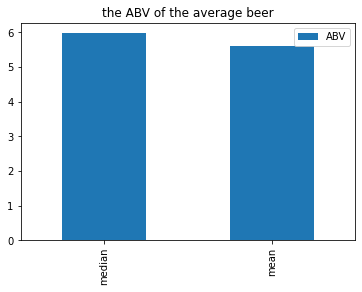

In [105]:
ABV_avg = [(df.ABV.mean(skipna=True)),(df.ABV.median(skipna=True)) ]
df_ABV = pd.DataFrame(ABV_avg)
df_ABV = df_ABV.set_axis(['ABV'],axis='columns')
df_ABV = df_ABV.set_axis(['median','mean'],axis='index')
df_ABV.plot(kind= 'bar', title = "the ABV of the average beer")



### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [109]:
import numpy as np

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [110]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [111]:
Brooklyn_NY = df[df.Location =="Brooklyn, NY"]
Brooklyn_NY.Beer

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most cans of beer?

In [21]:
Brooklyn_NY.Brewery.value_counts()
#Sixpoint Craft Ales 

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [112]:
sixpoint_df = df[df.Brewery == 'Sixpoint Craft Ales']
sixpoint_df.Style.value_counts().head(5)

# American IPA                      4
# Baltic Porter                     2
# American Double / Imperial IPA    2
# German Pilsener                   2
# Cream Ale                         2

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [119]:
Brew_NY = df[df.Location.str.contains("NY", na=False)]
Brew_NY

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [139]:
NY_all = Brew_NY.groupby(by='Brewery').agg([sum])
NY_all.info()
#16

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Blue Point Brewing Company to Upstate Brewing Company
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Beer, sum)      16 non-null     object 
 1   (Location, sum)  16 non-null     object 
 2   (Style, sum)     16 non-null     object 
 3   (Size, sum)      16 non-null     object 
 4   (ABV, sum)       16 non-null     float64
 5   (IBUs, sum)      16 non-null     object 
dtypes: float64(1), object(5)
memory usage: 896.0+ bytes


# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [19]:
IPA_df = df[df.Style.str.contains("IPA", na = False)]
IPA_df.IBUs.value_counts()

Does not apply    179
70                 44
65                 31
60                 28
75                 24
                 ... 
58                  1
126                 1
63                  1
46                  1
113                 1
Name: IBUs, Length: 72, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [143]:
import numpy as np

df.IBUs = df.IBUs.replace("Does not apply", np.nan)
df.IBUs.value_counts()

df.IBUs = df.IBUs.astype(float)
# ASK: Tip: Make sure you're giving na_values a LIST, not just a string ??????

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [144]:
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

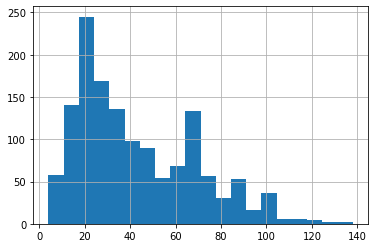

In [145]:
df.IBUs.hist(bins=20)



## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [163]:
df.IBUs.quantile(q=[0.25, 0.5, 0.75])

0.25    21.0
0.50    35.0
0.75    64.0
Name: IBUs, dtype: float64

In [164]:
high_IBUs_df = df[df.IBUs >=85]
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
high_IBUs_df.Beer

24                                  Habitus (2014)
25                                           Solis
27                                         Habitus
68                                            Csar
79                                      The Gadget
89                                      Gone A-Rye
110                                        Jah Mon
182                                 Double Duckpin
186                                     Hop A-Peel
218                               Hopkick Dropkick
245                                  Nugget Nectar
249                Bay of Bengal Double IPA (2014)
269                                   Back Bay IPA
274                         Unchained #18 Hop Silo
279                             Harness the Winter
282                                     Rule G IPA
288                       Yellow Wolf Imperial IPA
345                                 O’Malley’s IPA
372                        Hopportunity Knocks IPA
518                       Dream

## List all of the beers with IBUs below the 25th percentile

In [165]:
low_IBUs_df = df[df.IBUs<=60]
low_IBUs_df.Beer

0                                            Get Together
1                                           Maggie's Leap
2                                              Wall's End
3                                                 Pumpion
4                                              Stronghold
5                                             Parapet ESB
8                                                    35 K
9                                                  A Beer
10                                        Rules are Rules
11                                          Flesh Gourd'n
12                                               Sho'nuff
13                                            Bloody Show
15                                       Coq de la Marche
18                                         The Brown Note
19                                            House Lager
20                                           Leisure Time
23                                               Calyptra
26            

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [155]:
df.groupby('Style').IBUs.median().sort_values(ascending = False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<AxesSubplot:ylabel='Style'>

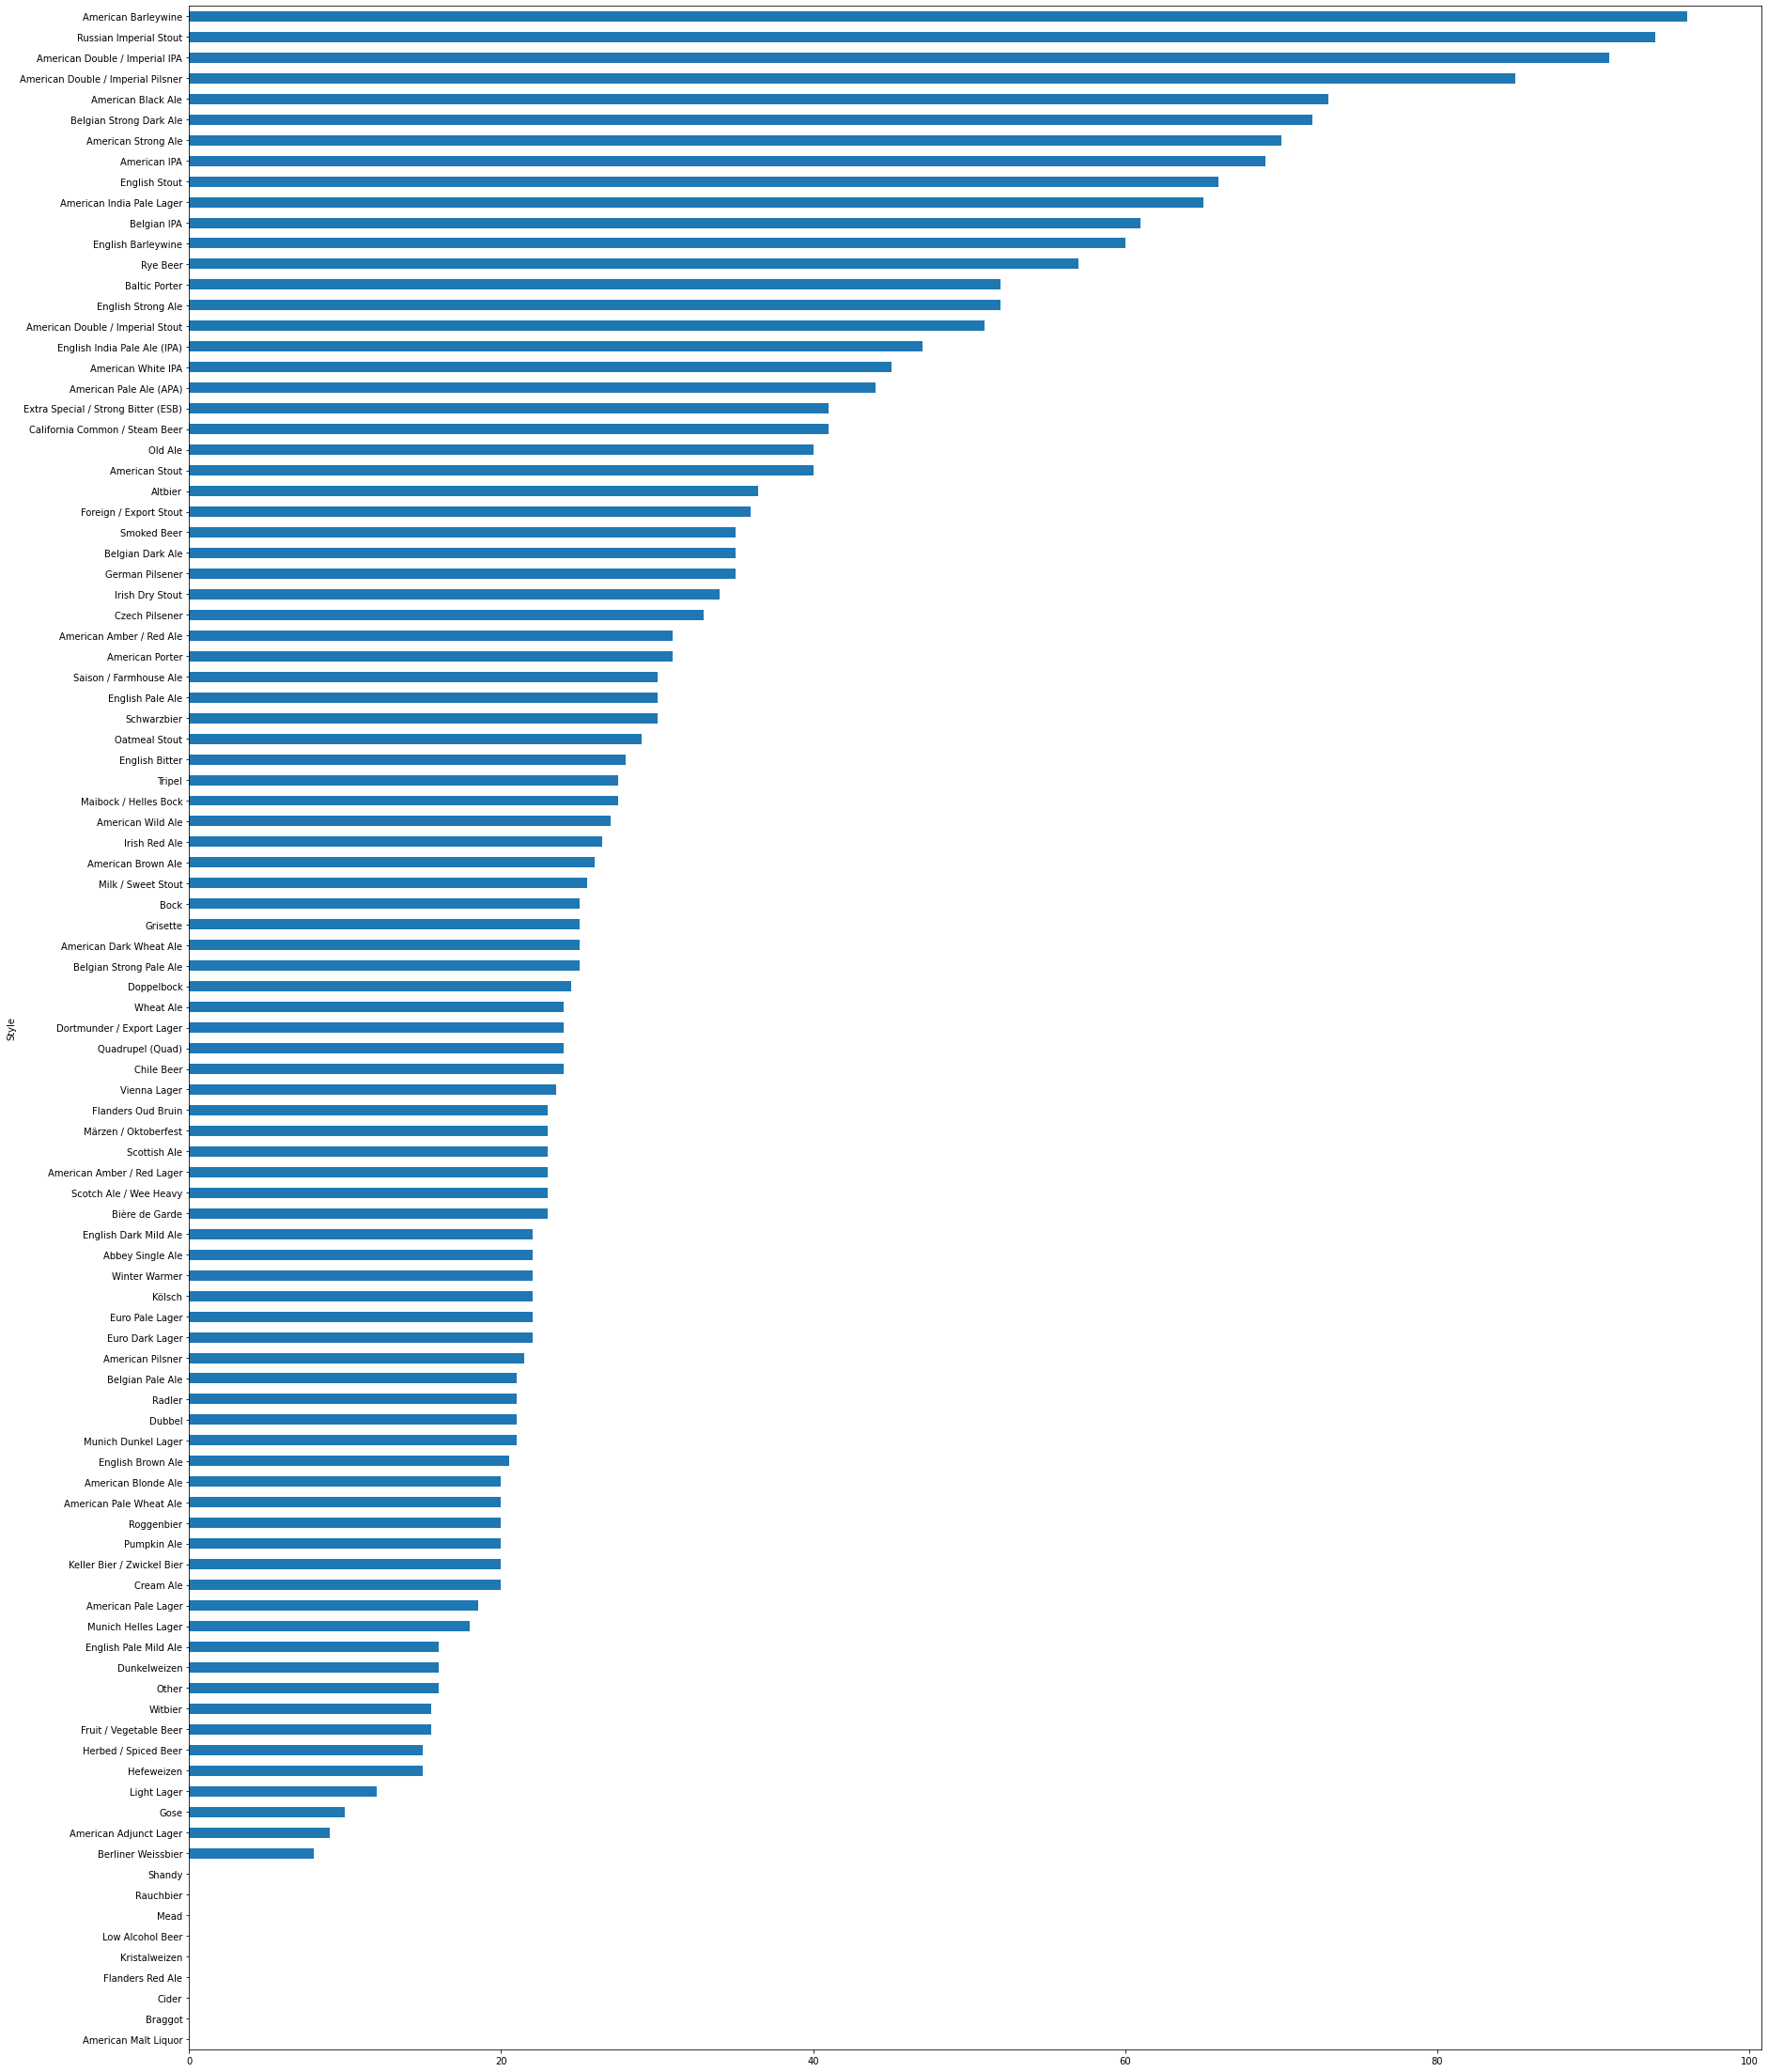

In [161]:
df.groupby('Style').IBUs.median().sort_values(na_position='first').plot.barh(figsize=(30,40))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [168]:
high_IBUs_df.Beer.value_counts().head(5)
# Dagger Falls IPA                              3
# BLAKKR                                        2
# Hop Slayer Double IPA (2011)                  2
# Heady Topper                                  2
# Gandhi-Bot Double IPA                         2



Dagger Falls IPA                3
BLAKKR                          2
Hop Slayer Double IPA (2011)    2
Heady Topper                    2
Gandhi-Bot Double IPA           2
Name: Beer, dtype: int64

In [169]:
low_IBUs_df.Beer.value_counts().head(5)
# Nonstop Hef Hop           12
# Longboard Island Lager     4
# 1327 Pod's ESB             3
# Boston Lager               3
# TailGate Hefeweizen        2


Nonstop Hef Hop           12
Longboard Island Lager     4
1327 Pod's ESB             3
Boston Lager               3
TailGate Hefeweizen        2
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [215]:
IBUs_WHA_df = df[df.Style.isin(['Witbier', 'Witbier', 'American Pale Wheat Ale','Wheat Ale'])]
IBUs_WHA_df
# IBUs_WHA_df.IBUs.mean()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
26,Jucundus,Mike Hess Brewing Company,"San Diego, CA",Wheat Ale,16 oz.,6.0,24.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
42,Whitewater,Great Divide Brewing Company,"Denver, CO",American Pale Wheat Ale,12 oz.,6.1,NaN
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.5,64.0
112,Summer Wheat,Anchor Brewing Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.5,NaN
164,Pinata Protest,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,6.0,NaN
167,Rye Wit,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,4.2,10.0
190,Beach Patrol,Brewery Vivant,"Grand Rapids, MI",Witbier,16 oz.,6.5,NaN
195,Oberon,Bell's Brewery,"Kalamazoo, MI",American Pale Wheat Ale,12 OZ.,5.8,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN



## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

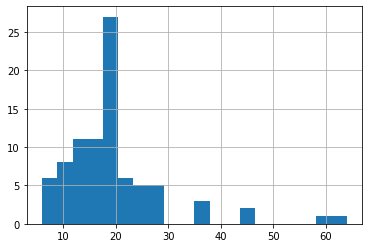

In [216]:
IBUs_WHA_df.IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [217]:
IPA_df = df[df.Style.str.contains('IPA',na=False)]
IPA_df.IBUs.mean()

71.94897959183673

<AxesSubplot:>

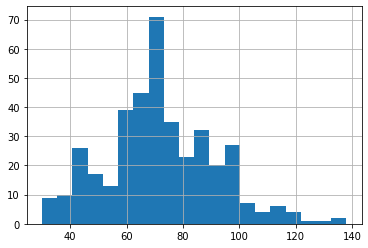

In [218]:
IPA_df.IBUs.hist(bins=20)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

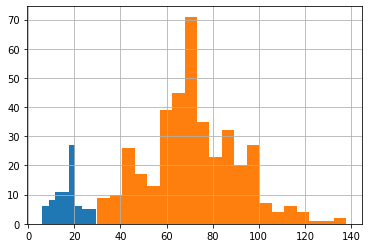

In [219]:
ax = IBUs_WHA_df.IBUs.hist(bins=20)
IPA_df.IBUs.hist(ax=ax,bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [224]:
IBUs_WHA_df.ABV.mean(skipna=True)
# 5.022758620689656
IPA_df.ABV.mean(skipna=True)
# 6.879285714285714

6.879285714285714

<AxesSubplot:>

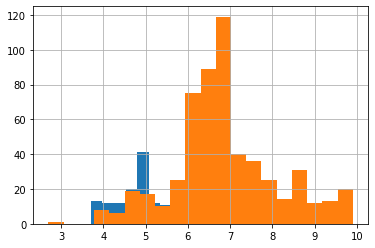

In [228]:
IBUs_WHA_df.ABV.hist(bins=20)
IPA_df.ABV.hist(bins=20)

## Good work!

If you made it this far you deserve a drink.

In [ ]:
# Which local Brewery in NYC do you recommend??